In [12]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from mpl_toolkits import mplot3d

In [13]:
df = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\Sweden_dataframe_2017.csv')

In [14]:
df.head()

,CET_TimeStamp,Actual_Total_Load,Day_Ahead_Price,Wind_Onshore_Gen_Actual,Wind_Onshore_generation_forecast,Residual_load
0,01.01.2017 01:00,2388.0,24.03,1226.0,1151.0,1162.0
1,01.01.2017 02:00,2342.0,24.03,1221.0,1151.0,1121.0
2,01.01.2017 03:00,2291.0,24.02,1228.0,1140.0,1063.0
3,01.01.2017 04:00,2189.0,23.19,1241.0,1133.0,948.0
4,01.01.2017 05:00,2155.0,24.10,1233.0,1113.0,922.0


In [6]:
# new data frame with split dates column
new_df = df["CET_TimeStamp"].str.split(" ", n=1, expand=True)

In [7]:
df["Date"]= new_df[0]
df["Hour"] = new_df[1]

In [8]:
df.head()

,CET_TimeStamp,Actual_Total_Load,Day_Ahead_Price,Wind_Onshore_Gen_Actual,Wind_Onshore_generation_forecast,Residual_load,Date,Hour
0,01.01.2017 01:00,2388.0,24.03,1226.0,1151.0,1162.0,01.01.2017,01:00
1,01.01.2017 02:00,2342.0,24.03,1221.0,1151.0,1121.0,01.01.2017,02:00
2,01.01.2017 03:00,2291.0,24.02,1228.0,1140.0,1063.0,01.01.2017,03:00
3,01.01.2017 04:00,2189.0,23.19,1241.0,1133.0,948.0,01.01.2017,04:00
4,01.01.2017 05:00,2155.0,24.10,1233.0,1113.0,922.0,01.01.2017,05:00


In [6]:
df = df.drop(columns=['CET_TimeStamp'])

In [7]:
df.head()

,Actual_Total_Load,Day_Ahead_Price,Wind_Onshore_Gen_Actual,Wind_Onshore_generation_forecast,Residual_load,Date,Hour
0,2388.0,24.03,1226.0,1151.0,1162.0,01.01.2017,01:00
1,2342.0,24.03,1221.0,1151.0,1121.0,01.01.2017,02:00
2,2291.0,24.02,1228.0,1140.0,1063.0,01.01.2017,03:00
3,2189.0,23.19,1241.0,1133.0,948.0,01.01.2017,04:00
4,2155.0,24.10,1233.0,1113.0,922.0,01.01.2017,05:00


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 7 columns):
Actual_Total_Load                   8761 non-null float64
Day_Ahead_Price                     8761 non-null float64
Wind_Onshore_Gen_Actual             8761 non-null float64
Wind_Onshore_generation_forecast    8761 non-null float64
Residual_load                       8761 non-null float64
Date                                8761 non-null datetime64[ns]
Hour                                8761 non-null object
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 479.2+ KB


In [10]:
# create variables for month
df['month'] = df['Date'].dt.month_name()
df

,Actual_Total_Load,Day_Ahead_Price,Wind_Onshore_Gen_Actual,Wind_Onshore_generation_forecast,Residual_load,Date,Hour,month
0,2388.0,24.03,1226.0,1151.0,1162.0,2017-01-01,01:00,January
1,2342.0,24.03,1221.0,1151.0,1121.0,2017-01-01,02:00,January
2,2291.0,24.02,1228.0,1140.0,1063.0,2017-01-01,03:00,January
3,2189.0,23.19,1241.0,1133.0,948.0,2017-01-01,04:00,January
4,2155.0,24.10,1233.0,1113.0,922.0,2017-01-01,05:00,January
5,2159.0,25.01,1198.0,1078.0,961.0,2017-01-01,06:00,January
6,2228.0,25.62,1113.0,1032.0,1115.0,2017-01-01,07:00,January
7,2352.0,25.87,1031.0,979.0,1321.0,2017-01-01,08:00,January
8,2427.0,26.18,952.0,919.0,1475.0,2017-01-01,09:00,January
9,2470.0,25.74,873.0,856.0,1597.0,2017-01-01,10:00,January


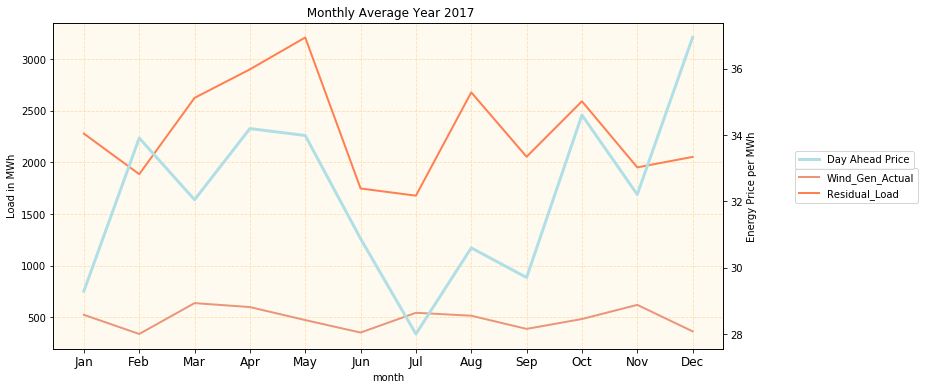

In [37]:
# Set the width and height of the figure
plt.figure(figsize=(12,6))

# Add title
plt.title(" Monthly Average Year 2017")

Price =  df.groupby('month')['Day_Ahead_Price'].agg(np.mean)


Wind_Generation = df.groupby('month')['Wind_Onshore_Gen_Actual'].agg(np.mean)
ax = sns.lineplot(x=Wind_Generation.index, y=Wind_Generation.values, color="darksalmon", linewidth=2, label='Wind_Gen_Actual')
Residual_load = df.groupby('month')['Residual_load'].agg(np.mean)
ax = sns.lineplot(x=Residual_load.index, y=Residual_load.values, color='coral', linewidth=2, label='Residual_Load')

plt.xticks(np.arange(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0, fontsize=12)
plt.ylabel('Load in MWh')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax.set_facecolor('floralwhite')
plt.grid(color = 'navajowhite',linestyle='--')


ax2 = ax.twinx()
sns.lineplot(x=Price.index, y=Price.values, color="powderblue", linewidth=3, label='Day Ahead Price')

plt.xticks(np.arange(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0, fontsize=12)
plt.ylabel('Energy Price per MWh')

# Put a legend to the right of the current axis
ax2.legend(loc='center left', bbox_to_anchor=(1.1, 0.58))

In [13]:
#df.to_csv('Heatmap_dataframe2017.csv')

In [15]:
### Heatmap

In [4]:
df1 = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\heatmap2017_month_price.csv')
df2 = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\heatmap2017_month_Load.csv')
df_residual = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\heatmap2017_month_residual_load.csv')
df_wind_act = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\heatmap2017_month_wind_actual.csv')
df_wind_for = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\heatmap2017_month_wind_forecast.csv')

In [5]:
df_residual.head()

,Hour,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0:00,NaN,3033.0,1907.0,1945.0,1836.0,1023.0,1525.0,1668.0,1560.0,1060,2196.0,2860.0
1,1:00,1162.0,2919.0,1901.0,1775.0,1727.0,888.0,1507.0,1514.0,1455.0,957,2127.0,2687.0
2,2:00,1121.0,2916.0,1790.0,1709.0,1591.0,831.0,1430.0,1463.0,1361.0,954,2030.0,2586.0
3,3:00,1063.0,2906.0,1630.0,1686.0,1520.0,948.0,1397.0,1441.0,1392.0,941,2035.0,2538.0
4,4:00,948.0,2924.0,1407.0,1744.0,1618.0,1095.0,1338.0,1486.0,1379.0,948,2061.0,2463.0


In [6]:
df1 = df1.set_index('Hour')
df2 = df2.set_index('Hour')
df_residual = df_residual.set_index('Hour')
df_wind_act = df_wind_act.set_index('Hour')
df_wind_for = df_wind_for.set_index('Hour')

In [11]:
Price1 =  df1.groupby('Hour').agg(np.mean)
Load = df2.groupby('Hour').agg(np.mean)
res_load = df_residual.groupby('Hour').agg(np.mean)
wind_act = df_wind_act.groupby('Hour').agg(np.mean)
wind_for = df_wind_for.groupby('Hour').agg(np.mean)

In [8]:
time = []
for i in range(24):
    if i < 10:
        time.append("0"+str(i)+":00")
    elif i >= 10:
        time.append(str(i)+":00")

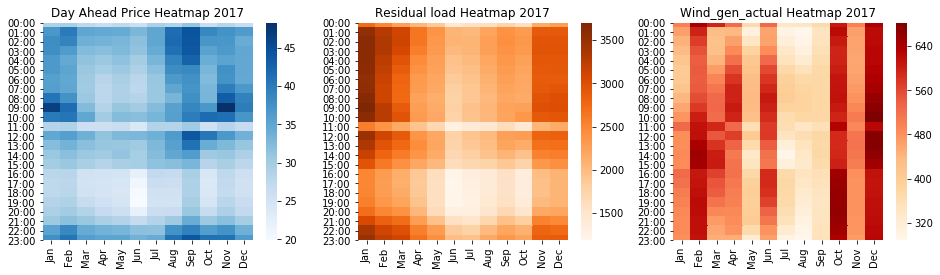

In [17]:
f, axes = plt.subplots(ncols=3, figsize=(16,4))

sns.heatmap(data=Price1, cmap="Blues", yticklabels = time, ax=axes[0])
axes[0].set_title('Day Ahead Price Heatmap 2017')

sns.heatmap(data=res_load, cmap="Oranges", yticklabels = time, ax=axes[1])
axes[1].set_title('Residual load Heatmap 2017')

sns.heatmap(data=wind_act, cmap="OrRd", yticklabels = time, ax=axes[2])
axes[2].set_title('Wind_gen_actual Heatmap 2017')


# Remove ylabel.
axes[0].set_ylabel('') 
axes[1].set_ylabel('') 
axes[2].set_ylabel('') 

plt.show()

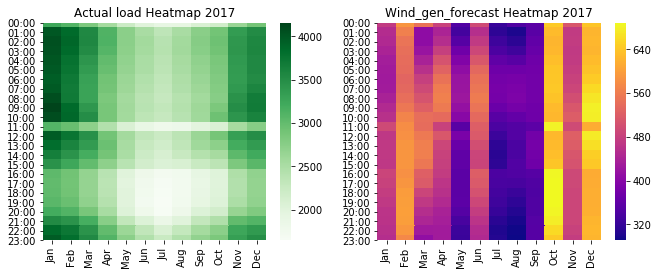

In [16]:
f, axes = plt.subplots(ncols=2, figsize=(11,4))

sns.heatmap(data=Load,cmap="Greens", yticklabels = time, ax=axes[0])
axes[0].set_title('Actual load Heatmap 2017')


sns.heatmap(data=wind_for,cmap="plasma", yticklabels = time, ax=axes[1])
axes[1].set_title('Wind_gen_forecast Heatmap 2017')


# Remove ylabel.
axes[0].set_ylabel('') 
axes[1].set_ylabel('')

plt.show()

In [15]:
df3 = df.copy()

In [10]:
df3.head

<bound method NDFrame.head of          CET_TimeStamp  Actual_Total_Load  Day_Ahead_Price  \
0     01.01.2017 01:00             2388.0            24.03   
1     01.01.2017 02:00             2342.0            24.03   
2     01.01.2017 03:00             2291.0            24.02   
3     01.01.2017 04:00             2189.0            23.19   
4     01.01.2017 05:00             2155.0            24.10   
5     01.01.2017 06:00             2159.0            25.01   
6     01.01.2017 07:00             2228.0            25.62   
7     01.01.2017 08:00             2352.0            25.87   
8     01.01.2017 09:00             2427.0            26.18   
9     01.01.2017 10:00             2470.0            25.74   
10    01.01.2017 11:00             2624.0            26.89   
11    01.01.2017 12:00             2792.0            27.48   
12    01.01.2017 13:00             2927.0            28.04   
13    01.01.2017 14:00             2922.0            28.70   
14    01.01.2017 15:00             2839.

In [16]:
df3 = df3.drop(columns=['CET_TimeStamp'])

In [17]:
df3.head()

,Actual_Total_Load,Day_Ahead_Price,Wind_Onshore_Gen_Actual,Wind_Onshore_generation_forecast,Residual_load
0,2388.0,24.03,1226.0,1151.0,1162.0
1,2342.0,24.03,1221.0,1151.0,1121.0
2,2291.0,24.02,1228.0,1140.0,1063.0
3,2189.0,23.19,1241.0,1133.0,948.0
4,2155.0,24.10,1233.0,1113.0,922.0


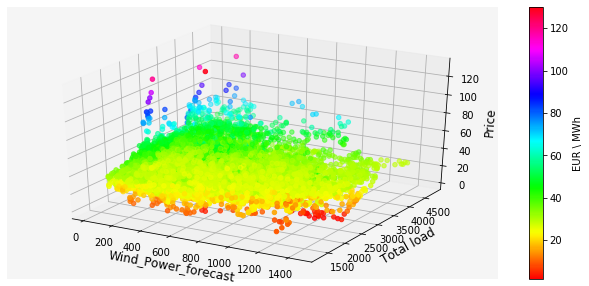

In [23]:
fig = plt.figure(figsize=(11,5))
ax5 = plt.axes(projection="3d")


Price = df3['Day_Ahead_Price']
wind_actual = df3['Wind_Onshore_Gen_Actual']
wind = df3['Wind_Onshore_generation_forecast']
load = df3['Residual_load']
tot_load = df3['Actual_Total_Load']
my_scatter_plot = ax5.scatter3D(wind, tot_load, Price, c=Price, cmap='hsv');


cbar = fig.colorbar(my_scatter_plot)
cbar.set_label('EUR \ MWh')
ax5.set_xlabel('Wind_Power_forecast', color='k', fontsize=12)
ax5.set_ylabel('Total load', color='k', fontsize=12)
ax5.set_zlabel('Price', color='k', fontsize=12)

ax5.set_facecolor('whitesmoke')

#plt.savefig('2017_3Dmap.png', dpi=100)
#plt.show()
plt.show()